In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from CorpusReader import CorpusReader

from collections import Counter
from matplotlib import pyplot
import pandas as pd
import pickle
import re
import os

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import WhitespaceTokenizer 
lemmatizer = WordNetLemmatizer()
tk = WhitespaceTokenizer()

nltk.download("stopwords")
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [3]:

def lemmatize(s):
    s = [lemmatizer.lemmatize(word) for word in s]
    return s
    
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    return lemmatize(words)

def whitespace_tokenizer(str_input):
    ret_words  = tk.tokenize(str_input) 
    return ret_words


In [4]:
classifier = Pipeline([
    ('features', FeatureUnion([
        #################### Lexical Features #####################

        ('e1', Pipeline([
            ('colext2', TextSelector('e1')),
            ('tfidf', TfidfVectorizer()),
        ])),
        ('e2', Pipeline([
            ('colext3', TextSelector('e2')),
            ('tfidf', TfidfVectorizer()),
        ])),        
        ('e1_tag', Pipeline([
            ('colext2', TextSelector('e1_tag')),
            ('tfidf', TfidfVectorizer()),
        ])),
        ('e2_tag', Pipeline([
            ('colext3', TextSelector('e2_tag')),
            ('tfidf', TfidfVectorizer()),
        ])),

        ('e1_dep', Pipeline([
            ('colext2', TextSelector('e1_dep')),
            ('tfidf', TfidfVectorizer()),
        ])),
        ('e2_dep', Pipeline([
            ('colext3', TextSelector('e2_dep')),
            ('tfidf', TfidfVectorizer()),
        ])),

        ('e1_or_e2_tag', Pipeline([
            ('colext10', TextSelector('e1_or_e2_tag')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),    

        ('before_e1', Pipeline([
            ('colext10', TextSelector('before_e1')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),    

        ('after_e2', Pipeline([
            ('colext10', TextSelector('after_e2')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),  

        ('between_e1_e2', Pipeline([
            ('colext7', TextSelector('between_e1_e2')),
            ('count_vec', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),

        ('prefix5between', Pipeline([
            ('colext9', TextSelector('prefix5between')),
            ('count_vec', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),

        ('distance_between', Pipeline([
            ('wordext1', NumberSelector('distance_between')),
            ('wscaler', StandardScaler()),
        ])),

        ('max_entity_sim', Pipeline([
            ('wordext1', NumberSelector('max_entity_sim')),
            ('wscaler', StandardScaler()),
        ])),

        ('shortest_path_len', Pipeline([
            ('wordext1', NumberSelector('shortest_path_len')),
            ('wscaler', StandardScaler()),
        ])),
        ('pos_tags_between', Pipeline([
            ('colext6', TextSelector('pos_tags_between')),
            ('tfidf', TfidfVectorizer()),
        ])),

        ('word_outside', Pipeline([
            ('colext10', TextSelector('word_outside')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),

        ############## WordNet Features #############
        
        ('HyperE1', Pipeline([
            ('colext10', TextSelector('HyperE1')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),       
       ('HyperE2', Pipeline([
            ('colext10', TextSelector('HyperE2')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),    
        
                
       ('lc_hyper', Pipeline([
            ('colext7', TextSelector('lc_hyper')),
            ('tfidf', TfidfVectorizer()),
        ])), 

        ########### Dependency Parsing Features ############
        ('connecting_path', Pipeline([
            ('colext10', TextSelector('connecting_path')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),    
        
        ('root_word_location', Pipeline([
        ('colext10', TextSelector('root_word_location')),
        ('tfidf', TfidfVectorizer()),
        ])), 
        
        ('sdp_root_lemma', Pipeline([
        ('colext10', TextSelector('sdp_root_lemma')),
        ('tfidf', TfidfVectorizer()),
        ])),     
        
        ('dep_path_len2_location', Pipeline([
            ('colext10', TextSelector('dep_path_len2_location')),
            ('tfidf', TfidfVectorizer()),
        ])),         

       ('dep_path_len1', Pipeline([
            ('colext10', TextSelector('dep_path_len1')),
            ('tfidf', TfidfVectorizer(tokenizer=whitespace_tokenizer)),
        ])),  
    ])),
    ('clf', LinearSVC(C = 0.1)),
    # ('clf', LogisticRegression()),
    # ('clf',DecisionTreeClassifier()),
    # ('clf',LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')),
    # ('clf', SVC(kernel='rbf', gamma = 0.00001, C = 1000)),
    # ('rf', RandomForestClassifier( class_weight=weights )),
    ])

In [5]:
train_file_path = os.path.join(os.getcwd(), 'train_df.csv')
test_file_path = os.path.join(os.getcwd(), 'test_df.csv')
print(train_file_path)

d:\UTDallas\Courses\Fall20 Semester\CS6320-NLP-Mithun\Final Project\Submission\RelationExtraction\train_df.csv


In [6]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [7]:
train_df = pd.concat([train_df,test_df])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10717 entries, 0 to 2716
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   input_sentence          10717 non-null  object 
 1   input_relation          10717 non-null  object 
 2   e1_or_e2_hyper          10493 non-null  object 
 3   e1                      10717 non-null  object 
 4   e2                      10717 non-null  object 
 5   words                   10717 non-null  object 
 6   before_e1               10220 non-null  object 
 7   between_e1_e2           10173 non-null  object 
 8   after_e2                10717 non-null  object 
 9   e1_or_e2_words          10717 non-null  object 
 10  sentence_string         10717 non-null  object 
 11  lemma                   10717 non-null  object 
 12  lemma_pos               10717 non-null  object 
 13  e1_ner                  68 non-null     object 
 14  e2_ner                  44 non-null    

In [9]:

col_to_change = ['input_sentence', 'input_relation', 'e1_or_e2_hyper', 'e1', 'e2', 'words', 'before_e1', 'between_e1_e2', 'after_e2', 'e1_or_e2_words', 'sentence_string', 'lemma', 'lemma_pos', 'e1_ner', 'e2_ner', 'word_outside', 'prefix5between', 'distance_between', 'e1_index', 'e2_index', 'pos_tags', 'e1_tag', 'e2_tag', 'e1_or_e2_tag', 'pos_tags_between', 'SynsetE1', 'SynsetE2', 'HyperE1', 'HyperE2', 'HypoE1', 'HypoE2', 'HoloE1', 'HoloE2', 'MeroE1', 'MeroE2', 'relation', 'direction', 'lc_hyper', 'parse_list', 'root_word_lemma', 'verb_class', 'only_classids', 'dep_path_len2_location', 'dep_path_len1', 'sdp_root_lemma', 'sdp_root', 'sdp_root_tag', 'connecting_path', 'e1_dep', 'e1_postag', 'e2_dep', 'e2_postag', 'root_word', 'shortest_path_len', 'shortest_path', 'root_word_location', 'max_entity_sim']
for col in col_to_change:
    train_df[col] = train_df[col].values.astype('U')

Counter({'Other nan': 1864, 'Entity-Destination e1,e2': 1135, 'Cause-Effect e2,e1': 853, 'Member-Collection e2,e1': 813, 'Entity-Origin e1,e2': 779, 'Message-Topic e1,e2': 700, 'Component-Whole e1,e2': 632, 'Component-Whole e2,e1': 621, 'Instrument-Agency e2,e1': 541, 'Content-Container e1,e2': 527, 'Product-Producer e2,e1': 517, 'Cause-Effect e1,e2': 478, 'Product-Producer e1,e2': 431, 'Content-Container e2,e1': 205, 'Message-Topic e2,e1': 195, 'Entity-Origin e2,e1': 195, 'Instrument-Agency e1,e2': 119, 'Member-Collection e1,e2': 110, 'Entity-Destination e2,e1': 2})
Class=Component-Whole e2,e1, n=621 (5.795%)
Class=Other nan, n=1864 (17.393%)
Class=Instrument-Agency e2,e1, n=541 (5.048%)
Class=Member-Collection e1,e2, n=110 (1.026%)
Class=Cause-Effect e2,e1, n=853 (7.959%)
Class=Entity-Destination e1,e2, n=1135 (10.591%)
Class=Content-Container e1,e2, n=527 (4.917%)
Class=Message-Topic e1,e2, n=700 (6.532%)
Class=Product-Producer e2,e1, n=517 (4.824%)
Class=Member-Collection e2,e1, n=

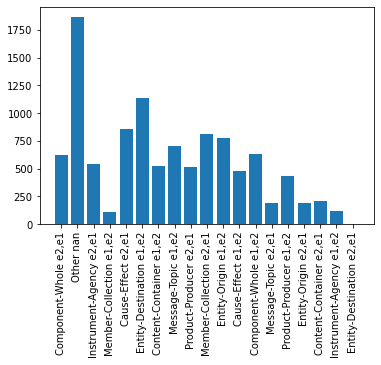

In [10]:
train_df['Y'] = train_df["relation"] + ' ' + train_df["direction"]
y_class =  train_df['Y']
counter = Counter(y_class)
print(counter)
for k,v in counter.items():
	per = v / len(y_class) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xticks(rotation='vertical')
pyplot.show()


In [11]:
labelencoder = LabelEncoder()
train_df['Y'] = labelencoder.fit_transform(train_df['Y'])
le_name_mapping = dict(zip(labelencoder.transform(labelencoder.classes_),labelencoder.classes_))
print(le_name_mapping)

{0: 'Cause-Effect e1,e2', 1: 'Cause-Effect e2,e1', 2: 'Component-Whole e1,e2', 3: 'Component-Whole e2,e1', 4: 'Content-Container e1,e2', 5: 'Content-Container e2,e1', 6: 'Entity-Destination e1,e2', 7: 'Entity-Destination e2,e1', 8: 'Entity-Origin e1,e2', 9: 'Entity-Origin e2,e1', 10: 'Instrument-Agency e1,e2', 11: 'Instrument-Agency e2,e1', 12: 'Member-Collection e1,e2', 13: 'Member-Collection e2,e1', 14: 'Message-Topic e1,e2', 15: 'Message-Topic e2,e1', 16: 'Other nan', 17: 'Product-Producer e1,e2', 18: 'Product-Producer e2,e1'}


In [12]:
X = train_df[['input_sentence', 'input_relation', 'e1_or_e2_hyper', 'e1', 'e2', 'words', 'before_e1', 'between_e1_e2', 'after_e2', 'e1_or_e2_words', 'sentence_string', 'lemma', 'lemma_pos', 'e1_ner', 'e2_ner', 'word_outside', 'prefix5between', 'distance_between', 'e1_index', 'e2_index', 'pos_tags', 'e1_tag', 'e2_tag', 'e1_or_e2_tag', 'pos_tags_between', 'SynsetE1', 'SynsetE2', 'HyperE1', 'HyperE2', 'HypoE1', 'HypoE2', 'HoloE1', 'HoloE2', 'MeroE1', 'MeroE2', 'relation', 'direction', 'lc_hyper', 'parse_list', 'root_word_lemma', 'verb_class', 'only_classids', 'dep_path_len2_location', 'dep_path_len1', 'sdp_root_lemma', 'sdp_root', 'sdp_root_tag', 'connecting_path', 'e1_dep', 'e1_postag', 'e2_dep', 'e2_postag', 'root_word', 'shortest_path_len', 'shortest_path', 'root_word_location', 'max_entity_sim']]

Y = train_df.loc[:, 'Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.25)

In [13]:
classifier.fit(X_train, y_train)


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('e1',
                                                 Pipeline(steps=[('colext2',
                                                                  TextSelector(field='e1')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer())])),
                                                ('e2',
                                                 Pipeline(steps=[('colext3',
                                                                  TextSelector(field='e2')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer())])),
                                                ('e1_tag',
                                                 Pipeline(steps=[('colext2',
                                                         

In [14]:
preds = classifier.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
print("F1-Score:",f1_score(y_test, preds, average='weighted'))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       120
           1       0.85      0.88      0.87       213
           2       0.81      0.81      0.81       158
           3       0.69      0.75      0.72       155
           4       0.82      0.88      0.85       132
           5       0.90      0.71      0.79        51
           6       0.84      0.93      0.88       284
           8       0.72      0.85      0.78       195
           9       0.82      0.82      0.82        49
          10       0.77      0.67      0.71        30
          11       0.68      0.75      0.71       135
          12       0.95      0.68      0.79        28
          13       0.76      0.97      0.85       203
          14       0.81      0.83      0.82       175
          15       0.82      0.65      0.73        49
          16       0.52      0.38      0.44       466
          17       0.70      0.79      0.74       108
          18

In [16]:
####Run below for predict new input sentenc ###

In [23]:

from CorpusReader import CorpusReader
predict_cr = CorpusReader('./dataset/predict_input.txt')
input_features = predict_cr.feature_extract()

predict_input_df = pd.DataFrame([t.__dict__ for t in input_features])

Scanning file: ./dataset/predict_input.txt
input_sentence -> Forward <e1>motion</e1> of the vehicle through the air caused a <e2>suction</e2> on the road draft tube.
input_relation -> 

e1_or_e2_hyper -> proposal.n.01 happening.n.01 state.n.02 communicate.v.02 optical_illusion.n.01 change.n.03 visual_communication.n.01
e1 -> motion
e2 -> suction
words -> ['Forward', 'motion', 'of', 'the', 'vehicle', 'through', 'the', 'air', 'caused', 'a', 'suction', 'on', 'the', 'road', 'draft', 'tube', '.']
before_e1 -> Forward
between_e1_e2 -> of the vehicle through the air caused a
after_e2 -> on the road draft tube .
e1_or_e2_words -> motion suction
sentence_string -> Forward motion of the vehicle through the air caused a suction on the road draft tube.
lemma -> ['Forward', 'motion', 'of', 'the', 'vehicle', 'through', 'the', 'air', 'caused', 'a', 'suction', 'on', 'the', 'road', 'draft', 'tube', '.']
lemma_pos -> Forward motion of the vehicle through the air cause a suction on the road draft tube .


In [18]:
predict_input_df

,input_sentence,input_relation,e1_or_e2_hyper,e1,e2,words,before_e1,between_e1_e2,after_e2,e1_or_e2_words,...,connecting_path,e1_dep,e1_postag,e2_dep,e2_postag,root_word,shortest_path_len,shortest_path,root_word_location,max_entity_sim
0,Forward <e1>motion</e1> of the vehicle through...,\n,proposal.n.01 happening.n.01 state.n.02 commun...,motion,suction,"[Forward, motion, of, the, vehicle, through, t...",Forward,of the vehicle through the air caused a,on the road draft tube .,motion suction,...,caused,nsubj,NOUN,dobj,NOUN,caused,2,motion caused suction,BETWEEN,0.705882


In [22]:
preds_input = classifier.predict(predict_input_df)

In [20]:
pred_relation , pred_direction = le_name_mapping[preds_input[0]].split()
print("The Predicted Relation is   ",pred_relation)
print("The Predicted Direction is   ",pred_direction)

The Predicted Relation is    Cause-Effect
The Predicted Direction is    e1,e2
